# Concentration de CO2 dans l'atmosphère depuis 1958

On s'intéresse à la concentration en CO2 au cours du temps depuis 1958; les données sont disponibles sur le site web [scrippsco2.ucsd.edu](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html)

Commençons par importer les bibliothèques nécessaires à l'analyse

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import isoweek
import os
from urllib.request import urlretrieve

## Chargement des données

Chargeons à présent les données. On vérifie si le fichier existe avant; si il n'existe pas on le charge avec `urlretrieve`


In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data_path = "./monthly_in_situ_co2_mlo.csv"

if not os.path.exists(data_path):
    urlretrieve(data_url, data_path)

Notons qu'un entête est présent qu'il faut supprimer (jusqu'à la ligne 60), ainsi que deux lignes 62 et 63 qui précisent le contenu de la colonne et son unité mais ne sont pas utiles ici

In [3]:
def skiprows(x):
    return x < 61 or x in [62,63]

data = pd.read_csv(data_path,skiprows=skiprows,skipinitialspace=True,na_values="-99.99")

In [4]:
data

Yr  Mn   Date     Date.1     CO2  seasonally     fit  seasonally.1  \
0    1958   1  21200  1958.0411     NaN         NaN     NaN           NaN   
1    1958   2  21231  1958.1260     NaN         NaN     NaN           NaN   
2    1958   3  21259  1958.2027  315.71      314.43  316.20        314.91   
3    1958   4  21290  1958.2877  317.45      315.16  317.30        314.99   
4    1958   5  21320  1958.3699  317.51      314.69  317.89        315.07   
5    1958   6  21351  1958.4548     NaN         NaN  317.27        315.15   
6    1958   7  21381  1958.5370  315.87      315.20  315.86        315.22   
7    1958   8  21412  1958.6219  314.93      316.22  313.96        315.29   
8    1958   9  21443  1958.7068  313.21      316.12  312.43        315.35   
9    1958  10  21473  1958.7890     NaN         NaN  312.42        315.41   
10   1958  11  21504  1958.8740  313.33      315.21  313.60        315.46   
11   1958  12  21534  1958.9562  314.67      315.43  314.77        315.52   
12   1959   1  21565  1959.0411  315.58      315.52  315.64        315.57   
13   1959   2  21596  1959.1260  316.49      315.84  316.30        315.64   
14   1959   3  21624  1959.2027  316.65      315.37  316.99        315.70   
15   1959   4  21655  1959.2877  317.72      315.41  318.09        315.77   
16   1959   5  21685  1959.3699  318.29      315.46  318.68        315.85   
17   1959   6  21716  1959.4548  318.15      316.00  318.07        315.94   
18   1959   7  21746  1959.5370  316.54      315.87  316.67        316.03   
19   1959   8  21777  1959.6219  314.80      316.09  314.80        316.13   
20   1959   9  21808  1959.7068  313.84      316.75  313.29        316.22   
21   1959  10  21838  1959.7890  313.33      316.35  313.31        316.31   
22   1959  11  21869  1959.8740  314.81      316.69  314.53        316.40   
23   1959  12  21899  1959.9562  315.58      316.35  315.72        316.48   
24   1960   1  21930  1960.0410  316.43      316.37  316.62        316.56   
25   1960   2  21961  1960.1257  316.98      316.33  317.30        316.64   
26   1960   3  21990  1960.2049  317.58      316.27  318.04        316.71   
27   1960   4  22021  1960.2896  319.03      316.70  319.14        316.79   
28   1960   5  22051  1960.3716  320.03      317.20  319.70        316.86   
29   1960   6  22082  1960.4563  319.59      317.45  319.04        316.93   
..    ...  ..    ...        ...     ...         ...     ...           ...   
774  2022   7  44757  2022.5370  418.71      417.91  418.94        418.18   
775  2022   8  44788  2022.6219  416.75      418.30  416.77        418.36   
776  2022   9  44819  2022.7068  415.42      418.91  415.04        418.55   
777  2022  10  44849  2022.7890  415.31      418.92  415.15        418.74   
778  2022  11  44880  2022.8740  417.03      419.29  416.71        418.95   
779  2022  12  44910  2022.9562  418.46      419.38  418.25        419.15   
780  2023   1  44941  2023.0411  419.13      419.06  419.45        419.37   
781  2023   2  44972  2023.1260  420.33      419.55  420.40        419.61   
782  2023   3  45000  2023.2027  420.51      418.97  421.39        419.83   
783  2023   4  45031  2023.2877  422.73      419.96  422.89        420.10   
784  2023   5  45061  2023.3699  423.78      420.38  423.77        420.37   
785  2023   6  45092  2023.4548  423.39      420.81  423.23        420.66   
786  2023   7  45122  2023.5370  421.62      420.82  421.73        420.96   
787  2023   8  45153  2023.6219  419.56      421.12  419.67        421.27   
788  2023   9  45184  2023.7068  418.06      421.56  418.06        421.58   
789  2023  10  45214  2023.7890  418.41      422.02  418.28        421.88   
790  2023  11  45245  2023.8740  420.11      422.38  419.95        422.19   
791  2023  12  45275  2023.9562  421.65      422.57  421.58        422.48   
792  2024   1  45306  2024.0410  422.62      422.55  422.85        422.77   
793  2024   2  45337  2024.1257  424.34      423.56  423.85        423.06   
794

Le fichier indique qu'à cause d'une éruption en 2022, la station MLO n'a pas pu faire de relevés et sont alors relevés par MKO. Nous nous intéresserons ici qu'à MLO et allons donc supprimer les entrées correspondantes à MKO. De plus, des NAN sont présents dans le jeux de données, on va donc supprimer les lignes correspondantes.

In [5]:
data_MLO = data[data["Sta"]=="MLO"].dropna()

## Un premier affichage des données
nous allons à présent pouvoir plotter les différentes courbes:

Text(0,0.5,'CO2 (ppm)')

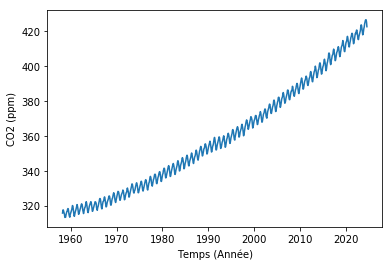

In [6]:
plt.plot(data_MLO["Date.1"],data_MLO["CO2"])
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 (ppm)")

Le fichier propose aussi directement les données de la quantité de CO2 dans l'atmosphère en enlevant la composant saisonnière ; nous allons donc dans un premier temps afficher ces données déjà traitées

Text(0,0.5,'CO2 (ppm)')

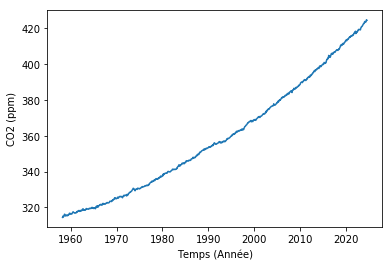

In [7]:
plt.plot(data_MLO["Date.1"],data_MLO["seasonally"])
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 (ppm)")

En soustrayant les deux nous pouvons alors en déduire les variations saisonnières

Text(0,0.5,'CO2 (ppm)')

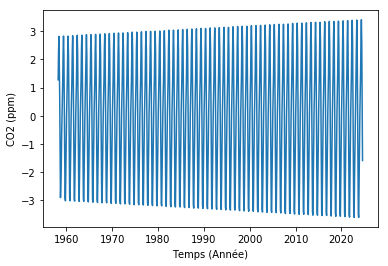

In [8]:
plt.plot(data_MLO["Date.1"],data_MLO["CO2"] - data_MLO["seasonally"])
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 (ppm)")

Zoomons un peu autour de 2020 - 2024 pour mieux se rendre compte des variations

(2020, 2024)

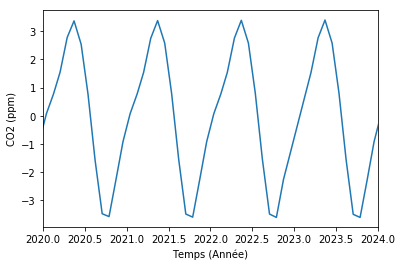

In [9]:
plt.plot(data_MLO["Date.1"],data_MLO["CO2"] - data_MLO["seasonally"])
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 (ppm)")
plt.xlim([2020,2024])

# Analyse des données

Bien que le fichier d'origine nous fournisse un jeu de données pré-traitées; nous allons désormais tenter de retrouver ces résultats en:
- identifiant la composante lente en un polynôme de degré 2 en fonction du temps
- identifiant par la suite la composante périodique en effectuant une analyse spectrale une fois la composante lente enlevée.

## Composante lente

on considère un polynôme de la forme $C(t) = a + b t + c t^2 + d t^3$. Nous allons appliquer une régression linéaire (grâce à [`np.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html))

Commençons par récupérer les tableaux numpy

In [10]:
temps = np.array(data_MLO["Date.1"])
CO2 = np.array(data_MLO["CO2"])

Pour que les temps soient de taille plus raisonnable, nous allons soustraire le temps initial à tout les temps afin de commencer à zéro:

In [11]:
temps = temps - temps[0]

Construisons ensuite la matrice qui nous permettra d'effectuer la régression linéaire:

$$ A_{i,j} = t_i^j $$

Cad,
$$ A = \begin{bmatrix}
        ... & ... & ... \\
        1 & 1^2 & 1^2 \\
        1 & 1,1^2 & 1,1^2 \\
        1 & 1,2^2 & 1,2^2 \\
        ... & ... & ...
        \end{bmatrix}$$

In [36]:
A = np.column_stack([temps**0,temps, temps**2,  temps**3])
print(A)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 8.50000000e-02 7.22500000e-03 6.14125000e-04]
 [1.00000000e+00 1.67200000e-01 2.79558400e-02 4.67421645e-03]
 ...
 [1.00000000e+00 6.62536000e+01 4.38953951e+03 2.90822795e+05]
 [1.00000000e+00 6.63356000e+01 4.40041183e+03 2.91903959e+05]
 [1.00000000e+00 6.64203000e+01 4.41165625e+03 2.93023532e+05]]


Nous pouvons à présent résoudre le système linéaire: $$ Ax = b$$

In [37]:
param = np.linalg.lstsq(A,CO2,rcond=None)
a,b,c, d = param[0] 
print(f"Estimation des coefficients de la régression: a = {a:.3f} ppm, b =  {b:.3f} ppm/annee, c = {c:.3f} ppm/annee^2,  d = {d:.3f} ppm/annee^3 " )

Estimation des coefficients de la régression: a = 314.165 ppm, b =  0.853 ppm/annee, c = 0.009 ppm/annee^2,  d = 0.000 ppm/annee^3 


Nous allons désormais afficher le CO2 au cours du temps et y superposer notre estimation. Commençons par définir une fonction qui renvoie la composante lente:

In [38]:
def CO2_comp_lente(t):
    return a + b*t + c*t**2 + d*t**3

Ajoutons une nouvelle **colonne** à notre jeu de données avec notre estimation:

In [39]:
CO2_estimation_lente = CO2_comp_lente(temps)
data_MLO["CO2_comp_lente"] = CO2_estimation_lente

Enfin, nous pouvons afficher notre estimation:

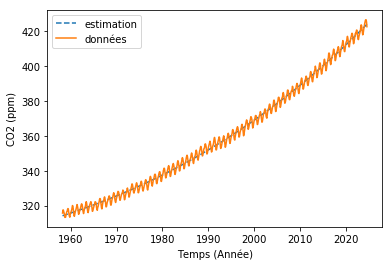

In [40]:
plt.plot(data_MLO["Date.1"],data_MLO["CO2_comp_lente"],"--",label="estimation")
plt.plot(data_MLO["Date.1"],data_MLO["CO2"],label="données")
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 (ppm)")
plt.legend()

## Composante périodique

Afin d'identifier la composante périodique, nous allons soustraire la composante lente à notre jeu de données et ensuite appliquer une transformée de Fourier qui permettra d'identifier la fréquence de l'oscillation

(0, 10)

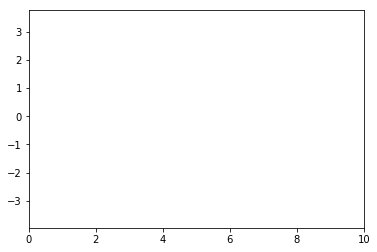

In [ ]:
CO2_periode = CO2 - data_MLO["seasonally"]
plt.plot(data_MLO["Date.1"],CO2_periode)

Afin de parvenir à ceci, nous devons tout d'abord trouver la fréquence d'échantillonnage de notre signal. Pour se faire, nous allons prendre la différence entre deux pas de temps:

In [55]:
delta_T = temps[5] - temps[4]
delta_T

0.08489999999983411

Maintenant nous pouvons calculer la fft

Text(0.5,0,'Fréquence (Année$^{-1}$)')

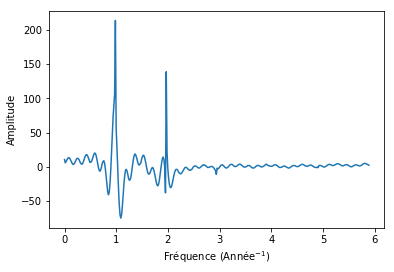

In [56]:
CO2_periode_fourier = np.real(np.fft.rfft(CO2_periode))
fourier_freq = np.fft.rfftfreq(CO2_periode.size,delta_T)

plt.plot(fourier_freq,CO2_periode_fourier)
plt.ylabel("Amplitude")
plt.xlabel("Fréquence (Année$^{-1}$)")

Nous observons alors 2 pics distinctifs autour de 1 et de 2 Année$^{-1}$ qui correspondent à des oscillations de longueur caractéristique une année et 1/2 année respectivement.
Nous allons ainsi nous intéresser aux pics autour de ces deux fréquences

Commençons par définir les bornes notre étude, la première à 0., la seconde à 1.5 et la troisième est à 2.5 

In [57]:
bornes = [0, 1.5, 2.5] 
indices_bornes = []
for borne in bornes:
    indice = np.nonzero(fourier_freq > borne )[0][0]
    indices_bornes.append(indice)

Ensuite, pour chaque composante nous allons en estimer la fréquence et afficher sur un graphe la fréquence trouvée.

La fréquence d'oscillation est située à: 0.984 Année^-1


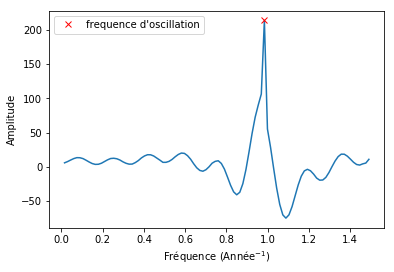

La fréquence d'oscillation est située à: 1.968 Année^-1


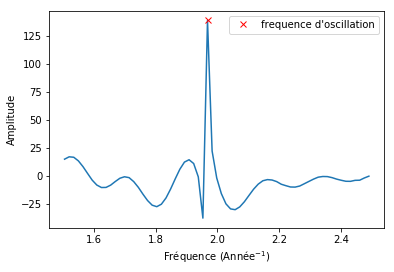

In [58]:
def trouver_freq(borne_inf,borne_sup):
    indice_freq = np.argmax(CO2_periode_fourier[borne_inf:borne_sup]) + borne_inf
    freq_max = fourier_freq[indice_freq]
    amplitude_max = CO2_periode_fourier[indice_freq]

    print(f"La fréquence d'oscillation est située à: {freq_max:.3f} Année^-1")
    plt.plot(fourier_freq[borne_inf:borne_sup],CO2_periode_fourier[borne_inf:borne_sup])
    plt.plot([freq_max], [amplitude_max], "xr", label="frequence d'oscillation")
    plt.ylabel("Amplitude")
    plt.xlabel("Fréquence (Année$^{-1}$)")
    plt.legend()
    plt.show()
    return freq_max

frequences = []
for i in range(len(indices_bornes) -1 ):
    freq = trouver_freq(indices_bornes[i], indices_bornes[i+1])
    frequences.append(freq)
frequences = np.array(frequences)

Enfin nous allons pouvoir identifier la partie périodique du signal en: $$ f(t) = \sum_{i=1}^{3} (c_i \cos(f_i t) + s_i \sin(f_i t)) $$

Comme précédemment, nous allons définir le problème $$ Ax = y$$ avec $x$ les temps, $A$ les échantillons des fonctions de base à chaque temps et  $y$ les mesures de CO2 (une fois la composante lente enlevée).

In [59]:
def assembler_A():
    tableau_colonnes = []
    for freq in frequences:
        colonne_c = np.cos(2.*np.pi * freq*temps) 
        colonne_s = np.sin(2.*np.pi * freq*temps) 
        tableau_colonnes.append(colonne_c)
        tableau_colonnes.append(colonne_s)
    return np.column_stack(tableau_colonnes)
A = assembler_A()
print(A)

[[ 1.          0.          1.          0.        ]
 [ 0.86505184  0.50168248  0.49662938  0.86796271]
 [ 0.51158037  0.85923543 -0.47657104  0.87913596]
 ...
 [ 0.33487846  0.94226133 -0.77571283  0.63108605]
 [-0.1647631   0.98633317 -0.94570624 -0.32502262]
 [-0.6359243   0.77175144 -0.19120057 -0.98155099]]


Enfin, nous pouvons résoudre le système linéaire

In [60]:
w = np.linalg.lstsq(A,CO2_periode, rcond=None)[0]
print(f"Les paramètres estimés sont {w}")

Les paramètres estimés sont [ 0.09456166  0.1400933  -0.03932497  0.03291844]


Définissons enfin la fonction périodique $f(t)$ grâce aux $w_i$ obtenus précédemments:

In [61]:
w_c = np.array([w[i] for i in range(len(w)) if i%2])
w_s = np.array([w[i] for i in range(len(w)) if (i-1)%2])
print(w_c,w_s)
def CO2_comp_periode(t):
    return  np.dot(w_c, np.sin( 2.*np.pi * np.outer(frequences,t))) + np.dot(w_c,np.cos(2.*np.pi * np.outer(frequences,t)))

[0.1400933  0.03291844] [ 0.09456166 -0.03932497]


Enfin, nous pouvons afficher la composante périodique sur un graphe

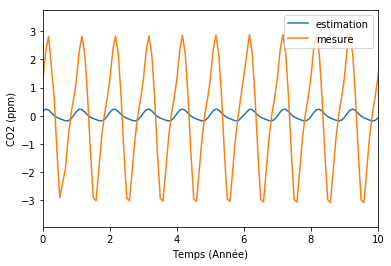

In [63]:
plt.plot(temps,CO2_comp_periode(temps), label="estimation")
plt.plot(temps,CO2_periode, label="mesure")
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 (ppm)")
plt.xlim(0,10)
plt.legend()

Enfin essayons d'afficher le taux de CO2 au cours du temps en extrapolant jusqu'à 2027.

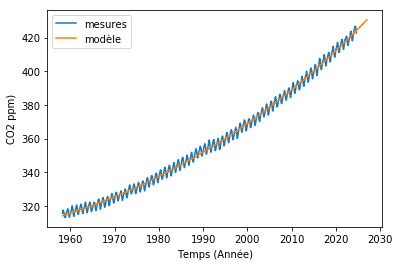

In [53]:
temps_zero = np.array(data_MLO["Date.1"])[0]
plt.plot(temps_zero + temps,CO2, label="mesures")


temps_extrapol = np.hstack([temps, np.arange(temps[-1] + 0.8, temps[-1] + 3, 0.8 )])
plt.plot(temps_zero + temps_extrapol,  CO2_comp_lente(temps_extrapol), label="modèle")
plt.xlabel("Temps (Année)")
plt.ylabel("CO2 ppm)")
plt.legend()